In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

# Reading the data 
df = pd.read_csv("calories.csv", index_col=0)
df.head()

/home/oscarm524/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,,,,,,,,
14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


# Boxplot

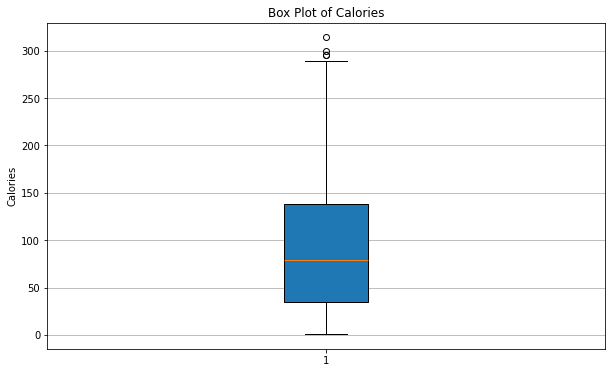

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.boxplot(df['Calories'], vert=True, patch_artist=True)
ax.set_title('Box Plot of Calories')
ax.set_ylabel('Calories')
ax.grid(axis='y')
plt.show();

# Side-by-Side Boxplot

/tmp/ipykernel_76313/637728622.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax.boxplot([males_calories, females_calories], labels=["Male", "Female"], patch_artist=True)


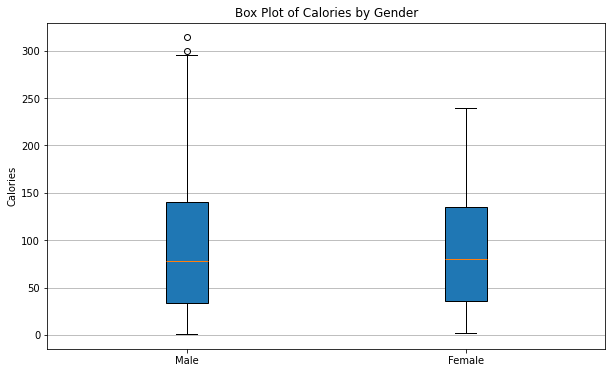

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

# Subsetting the data 
males_calories = df[df["Gender"]=="male"]["Calories"]
females_calories = df[df["Gender"]=="female"]["Calories"]

# Side-by-side boxplot
box_plot = ax.boxplot([males_calories, females_calories], labels=["Male", "Female"], patch_artist=True)

ax.set_title('Box Plot of Calories by Gender')
ax.set_ylabel('Calories')
ax.grid(axis='y')
plt.show();

# Scatter-plot

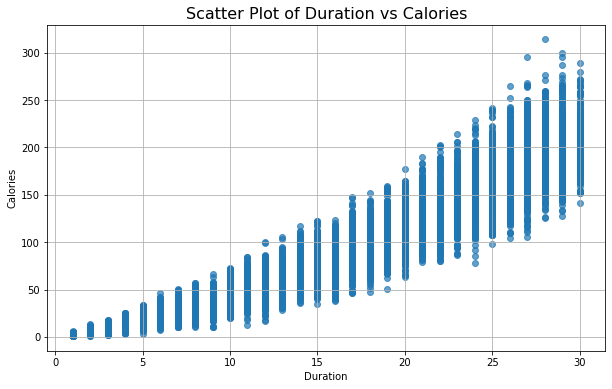

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

# Creating the scatter plot
ax.scatter(df['Duration'], df['Calories'], alpha=0.7)
ax.set_title('Scatter Plot of Duration vs Calories', fontsize=16)
ax.set_xlabel('Duration')
ax.set_ylabel('Calories')
ax.grid()
plt.show();

# Correlation Heatmap

In [13]:
df.drop(columns="Gender", axis=1).corr()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Age,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


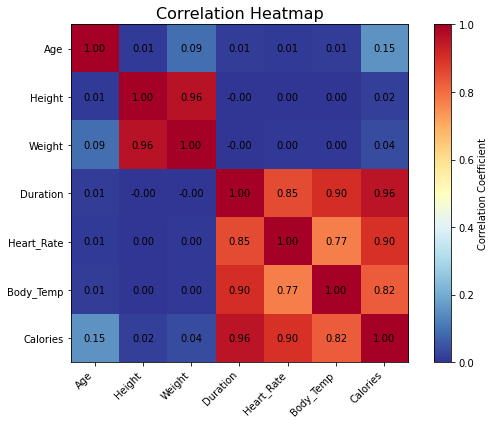

In [26]:
import numpy as np

# Computing the correlation matrix
corr_matrix = df.drop(columns="Gender", axis=1).corr()

fig, ax = plt.subplots(figsize=(8, 6))

# Creating the heatmap
im = ax.imshow(corr_matrix, cmap='RdYlBu_r', vmin=0, vmax=1)

# Setting the ticks and labels
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

# Rotating the x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right");

# Adding the color bar
cbar = plt.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Correlation Coefficient', rotation=90)

# Adding the correlation coefficients on the heatmap
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black")

ax.set_title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show();